
## Ahmad Sameh Abdelsalam
### TAsk 2 : Prediction using Unsupervised ML
### GRIP @ The Sparks Foundation



In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import adjusted_rand_score

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df = df.drop("Id",axis=1)

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
X = df.drop("Species",axis=1)

In [9]:
y = df["Species"]

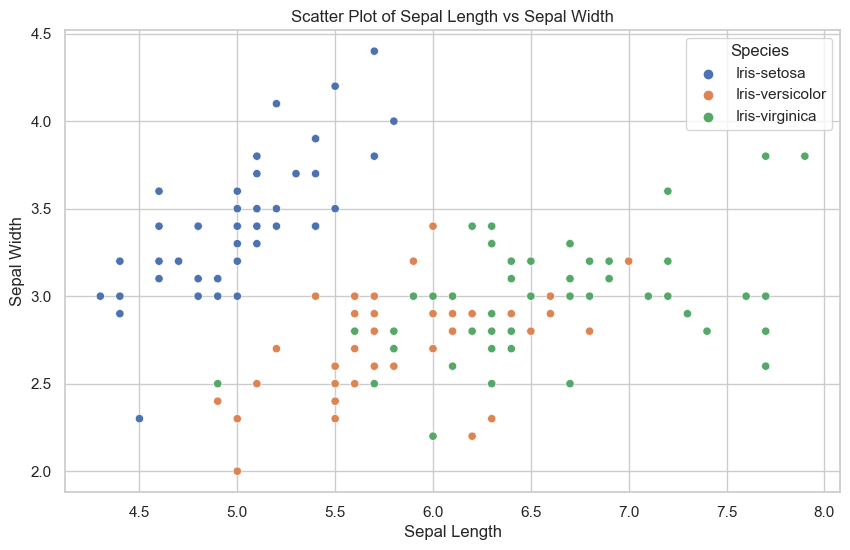

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Scatter Plot of Sepal Length vs Sepal Width")


plt.legend(title="Species")
plt.show()

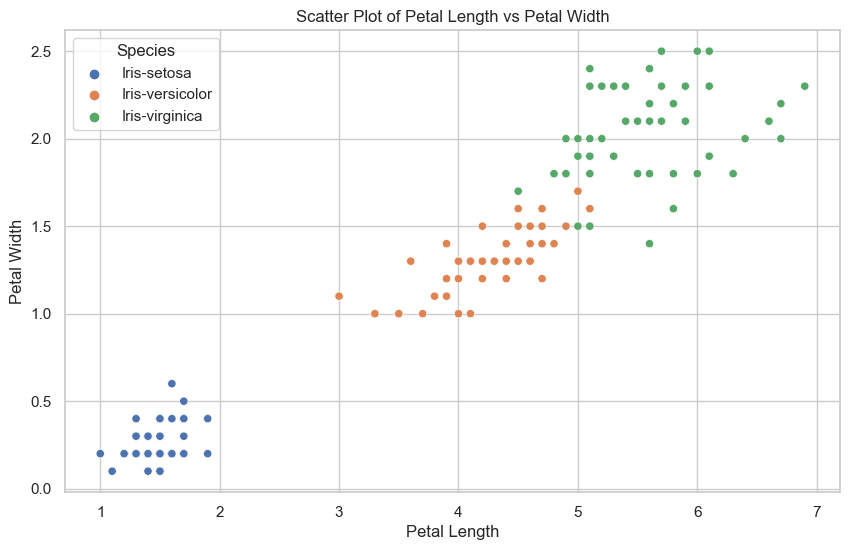

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Scatter Plot of Petal Length vs Petal Width")


plt.legend(title="Species")
plt.show()

In [ ]:
cluster_range = range(1, 11)

wcss = []
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

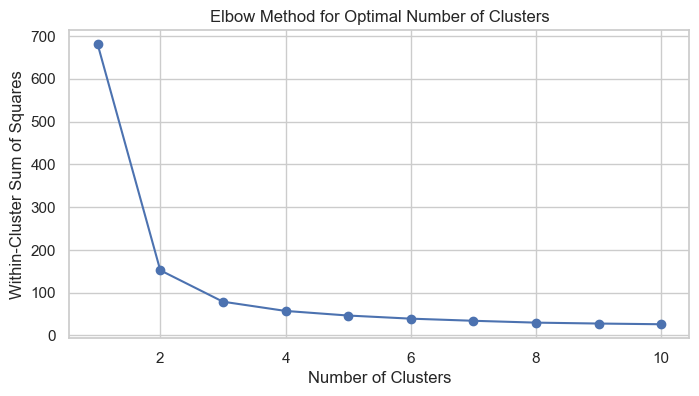

In [44]:
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [62]:
kmeans = KMeans(n_clusters=3,random_state=42)
cluster_labels = kmeans.fit_predict(X)
ari_score = adjusted_rand_score(y, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari_score}")

Adjusted Rand Index (ARI): 0.7302382722834697


C:\Users\Ahmad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


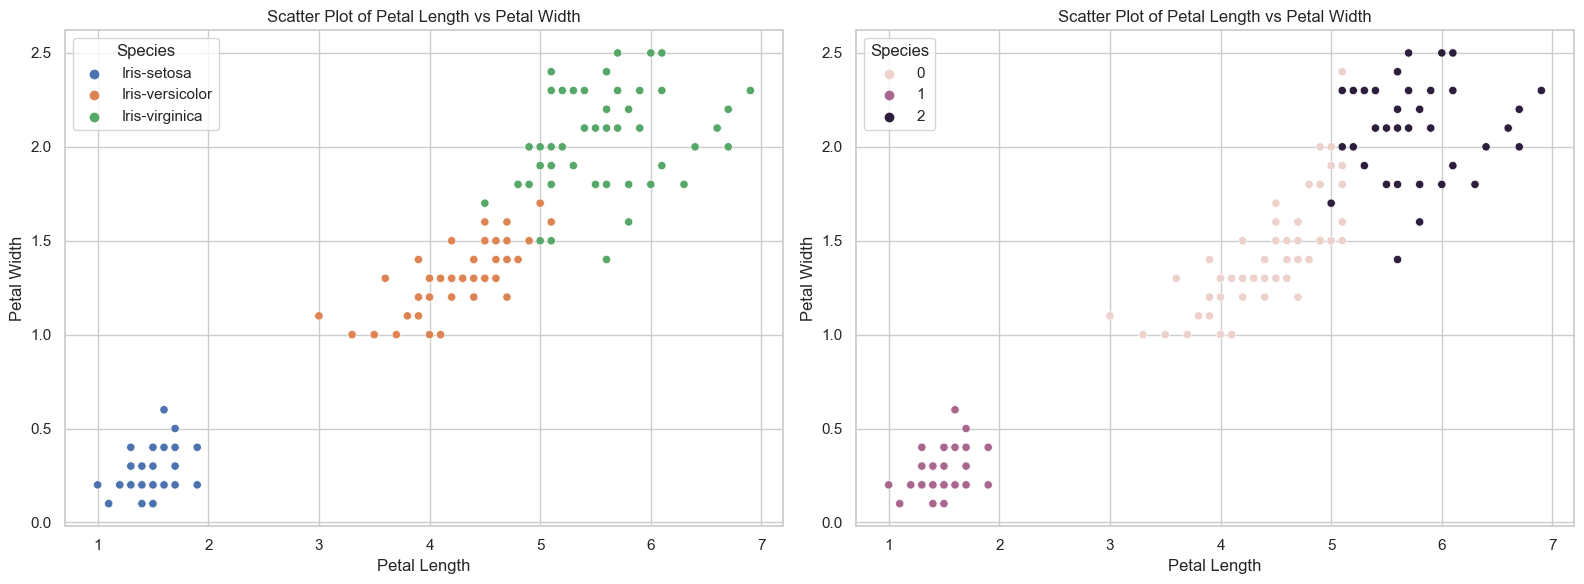

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  

sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue=y, data=df, ax=axes[0])
axes[0].set_xlabel("Petal Length")
axes[0].set_ylabel("Petal Width")
axes[0].set_title("Scatter Plot of Petal Length vs Petal Width before K-means")
axes[0].legend(title="Species")


sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue=cluster_labels, data=df, ax=axes[1])
axes[1].set_xlabel("Petal Length")
axes[1].set_ylabel("Petal Width")
axes[1].set_title("Scatter Plot of Petal Length vs Petal Width after K-means")
axes[1].legend(title="Species")

plt.tight_layout()


plt.show()

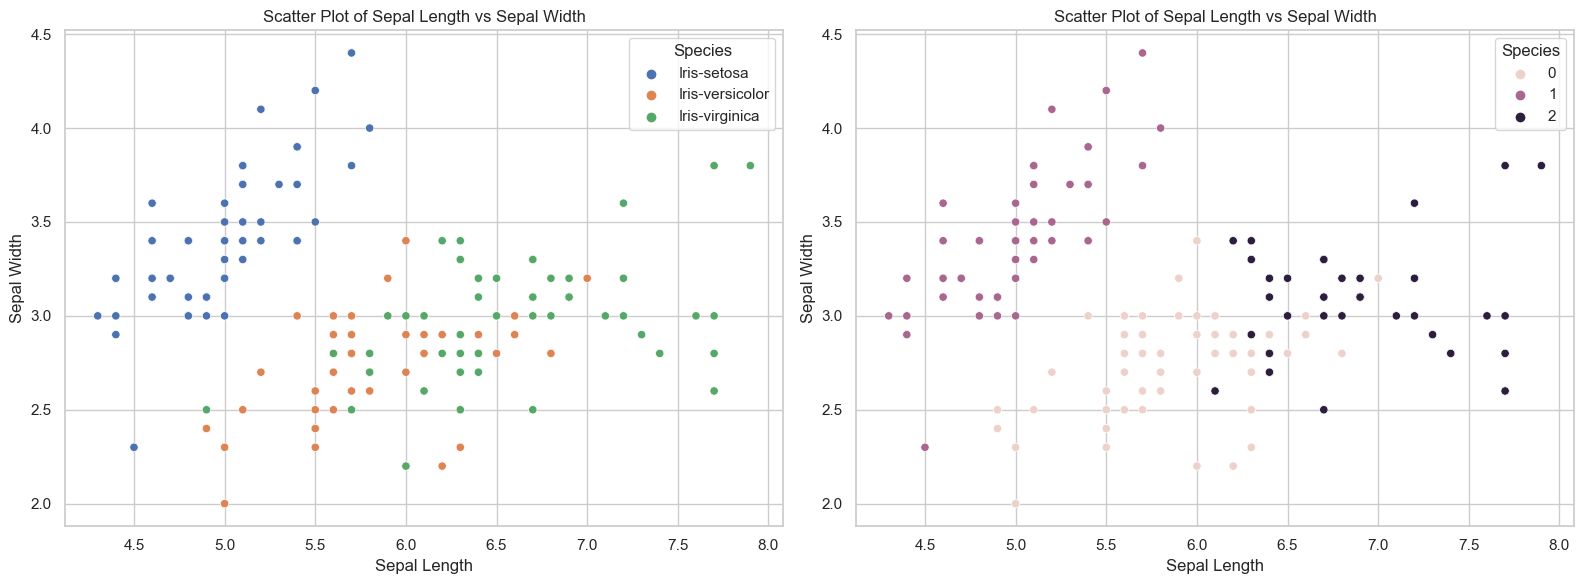

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  

sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue=y, data=df, ax=axes[0])
axes[0].set_xlabel("Sepal Length")
axes[0].set_ylabel("Sepal Width")
axes[0].set_title("Scatter Plot of Sepal Length vs Sepal Width")
axes[0].legend(title="Species")


sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue=cluster_labels, data=df, ax=axes[1])
axes[1].set_xlabel("Sepal Length")
axes[1].set_ylabel("Sepal Width")
axes[1].set_title("Scatter Plot of Sepal Length vs Sepal Width")
axes[1].legend(title="Species")


plt.tight_layout()


plt.show()

### After some plots and doing the elbow method to determine number of clusters which is 3 I did plot another set of graphs to see the difference before and after of Data
